In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_business = pd.read_json('yelp_academic_dataset_business.json',lines=True)
# df_checkin = pd.read_json('yelp_academic_dataset_checkin.json',lines=True)
# df_tips = pd.read_json('yelp_academic_dataset_tip.json',lines=True)
# df_user = pd.read_json('yelp_academic_dataset_user.json',lines=True)

# Finding all categories in LA

In [ ]:
df=df_business.loc[df_business['city'].str.contains('Las Vegas')]

# Exploratory Data Analysis

In [ ]:
df_business

# null values

In [ ]:
df_business.isna().any()

In [ ]:
df_business.loc[df_business['categories'].isna()]

# city counts

In [ ]:
df_business['city'].unique().size

In [ ]:
cityCount = df_business['city'].value_counts()[:10]

print(cityCount)

plt.figure(figsize=(10,5))
sns.barplot(cityCount.values,cityCount.index)

plt.show()

# name counts

In [ ]:
df_business['name'].value_counts()[:10]

In [ ]:
nameCount = df_business['name'].value_counts()[:10]

print(nameCount)

plt.figure(figsize=(10,5))
sns.barplot(nameCount.values,nameCount.index)
plt.show()

# Address

In [ ]:
df_business['address'].value_counts()

In [ ]:
addressCount = df_business['address'].value_counts()[1:10]

print(addressCount)

plt.figure(figsize=(10,5))
sns.barplot(addressCount.values,addressCount.index)
plt.show()

# Stars

In [ ]:
df_business['stars'].value_counts()

In [ ]:
df_business['stars'].mean()

In [ ]:
df_business['stars'].median()

In [ ]:
df_business['stars'].max()

In [ ]:
df_business['stars'].min()

In [ ]:
df_business['stars'].std()

In [ ]:
plt.hist(df_business['stars'],bins=20)
plt.show()

# Categories

In [10]:
x = df_business.loc[:,['name','categories']]

In [11]:
x

,name,categories
0,The Range At Lake Norman,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh..."
1,"Carlos Santo, NMD","Health & Medical, Fitness & Instruction, Yoga,..."
2,Felinus,"Pets, Pet Services, Pet Groomers"
3,Nevada House of Hose,"Hardware Stores, Home Services, Building Suppl..."
4,USE MY GUY SERVICES LLC,"Home Services, Plumbing, Electricians, Handyma..."
...,...,...
209388,Nishi Sushi,"Japanese, Sushi Bars, Restaurants"
209389,Walmart,"Department Stores, Food, Mobile Phones, Fashio..."
209390,Five Guys,"American (New), Food, Burgers, Restaurants, Fa..."
209391,Indian Trail Dog Training,"Pet Services, Pet Training, Pets"


In [12]:
x.categories = x.categories.apply(lambda x: [y.strip() for y in x.split(',')] if x!=None else " ")

In [13]:
x = x.explode(column='categories')

In [15]:
x['categories'].value_counts()

Restaurants             63944
Shopping                34644
Food                    32991
Home Services           22487
Beauty & Spas           20520
                        ...  
Elevator Services           1
Sport Equipment Hire        1
Ceremonial Clothing         1
Tempura                     1
Backshop                    1
Name: categories, Length: 1337, dtype: int64

Shopping            34644
Food                32991
Home Services       22487
Beauty & Spas       20520
Health & Medical    19227
Local Services      15783
Automotive          14720
Nightlife           14211
Bars                12400
Name: categories, dtype: int64


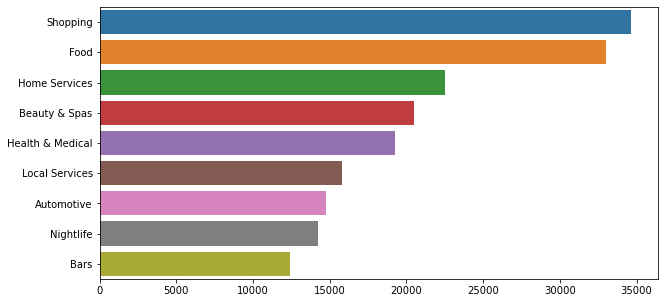

In [16]:
catCount = x['categories'].value_counts()[1:10]

print(catCount)

plt.figure(figsize=(10,5))
sns.barplot(catCount.values,catCount.index)
plt.show()

# Extract categories for filtering

In [ ]:
def findCat(df):
    if df.categories != None:
        listOfCat=df.categories.split(',')
        return listOfCat
    else:
        return []

In [ ]:
categories=[]
for i in range(len(df)):
    categories = categories + findCat(df.iloc[i])

In [ ]:
categories.sort()

In [ ]:
res = []
for each in categories:
    if each not in res:
        res.append(each)

In [ ]:
df2 = pd.DataFrame()

In [ ]:
df2['categories']=res

In [ ]:
df2.to_csv('categories.csv')

# from here manually filter categories belonging to food.
# list of food categories in 'categories_filtered.csv'

# Finding business that are food

In [ ]:
# Extract all categories_filtered into a list

df_categories = pd.read_csv('categories_filtered.csv',index_col=0)

catlist = []
for i in range(len(df_categories)+1):
    if i!=29:
        catlist.append(df_categories['categories'][i])

# extracting rows that contains categories filtered

In [ ]:
def findCat(x):
    res = []
    if x != None:
        xsplit = x.split(',')
        for each in xsplit:
            if each.strip() in catlist:
                res.append(each)
        if len(res)==0:
            return 0
        else: return res
    else:
        return 0

In [ ]:
df2=pd.DataFrame(df['categories'].apply(lambda x:findCat(x)))

In [ ]:
indexes=df2[df2['categories']!=0].index

In [ ]:
columnsWeNeed = ['business_id', 'latitude', 'longitude', 'stars', 'review_count', 'categories']

df_out = df_business.iloc[indexes].loc[:,columnsWeNeed].reset_index(drop=True)

In [ ]:
df_out

In [ ]:
df_out.to_csv('yelp_business.csv')

# exploration

In [ ]:
df = pd.read_csv('yelp_business.csv')